<a href="https://colab.research.google.com/github/sasvanthu/Intenship/blob/main/AIML_Internship_IBM_Employee_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LinearRegression: R² Score = 0.8522, MSE = 354251229.21
RandomForest: R² Score = 0.8683, MSE = 315878566.67
SVR: R² Score = -0.0224, MSE = 2451246749.49
DecisionTree: R² Score = 0.7990, MSE = 482000000.00

✅ Best model: RandomForest with R² Score 0.8683
✅ Saved best model as best_model.pkl


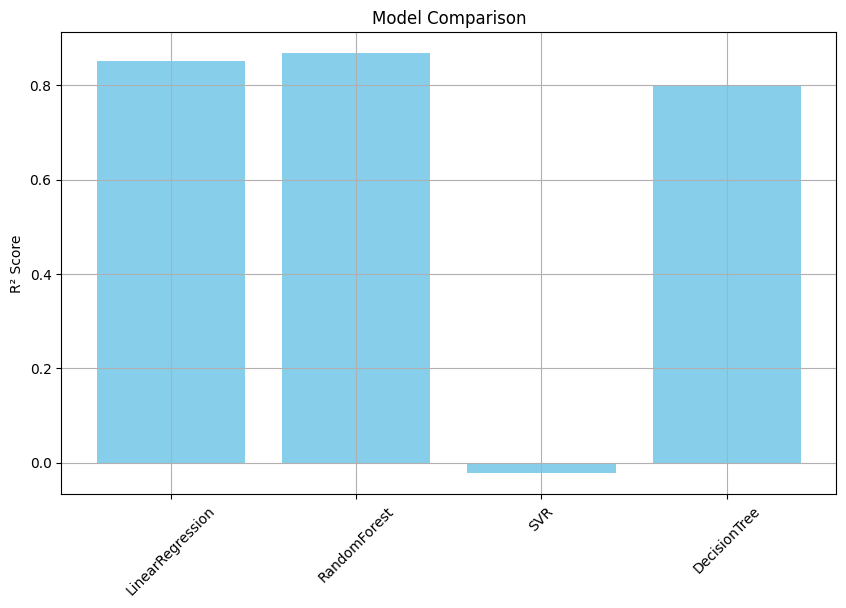

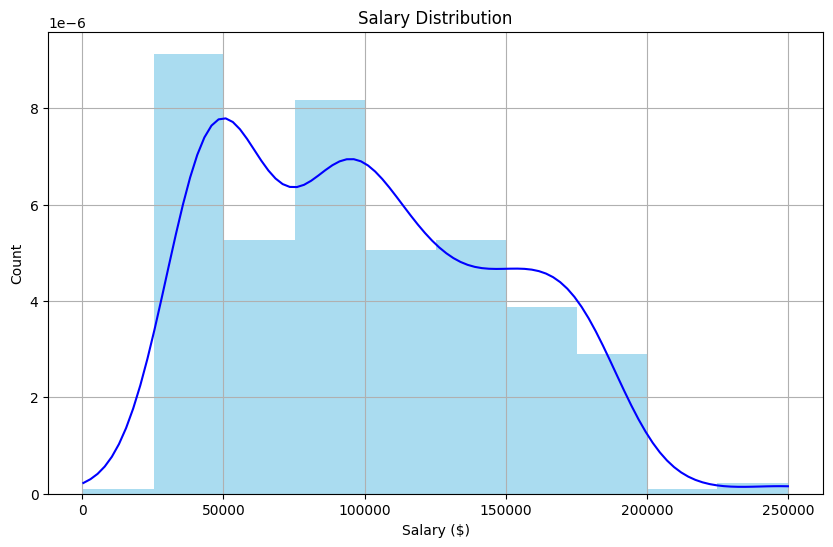

<Figure size 1000x600 with 0 Axes>

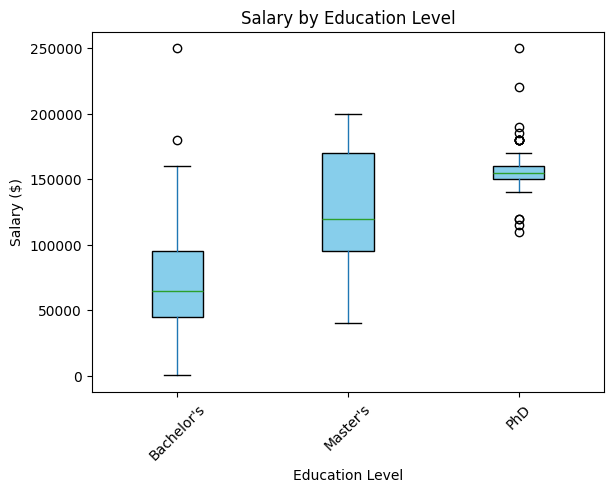

<Figure size 800x600 with 0 Axes>

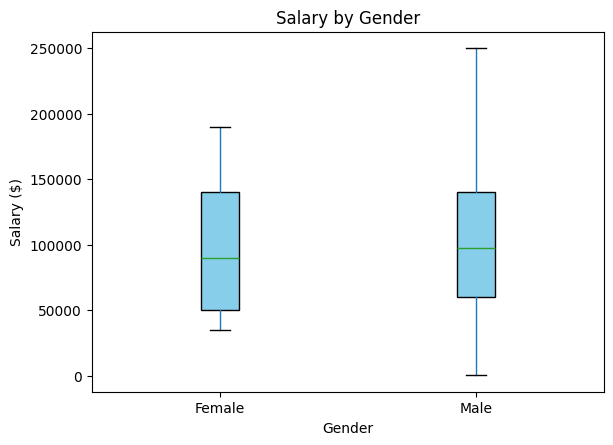

<Figure size 1200x600 with 0 Axes>

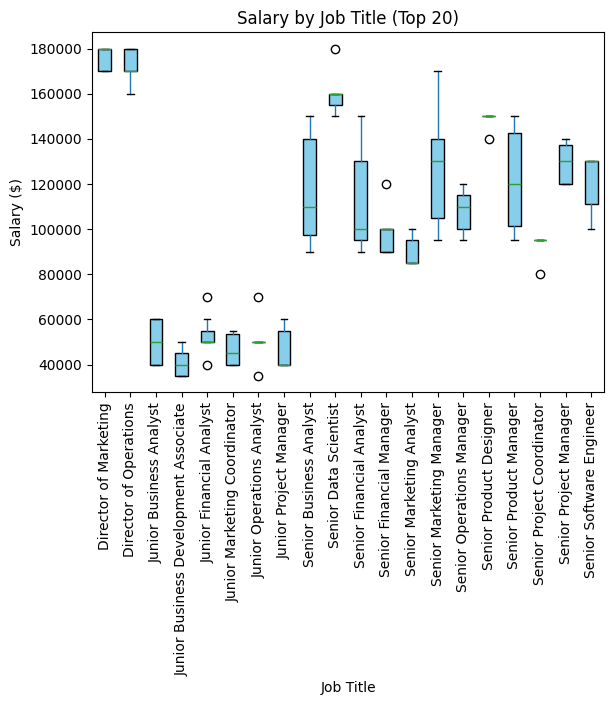

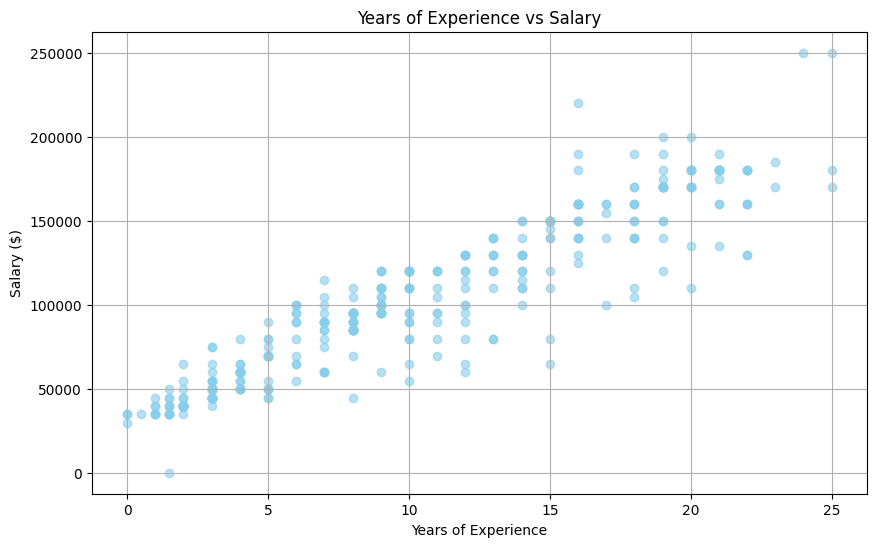

--2025-07-20 04:20:44--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 13.248.244.96, 35.71.179.82, 99.83.220.108, ...
Connecting to bin.equinox.io (bin.equinox.io)|13.248.244.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9260570 (8.8M) [application/octet-stream]
Saving to: ‘ngrok-v3-stable-linux-amd64.tgz.2’

ngrok-v3-stable-lin 100%[===================>]   8.83M  15.1MB/s    in 0.6s    

2025-07-20 04:20:45 (15.1 MB/s) - ‘ngrok-v3-stable-linux-amd64.tgz.2’ saved [9260570/9260570]

ngrok
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit app is live at: NgrokTunnel: "https://a58a2df8e190.ngrok-free.app" -> "http://localhost:8501"


In [8]:
# Install required libraries
!pip install streamlit pyngrok pandas numpy scikit-learn matplotlib

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import streamlit as st
from pyngrok import ngrok
import os
import matplotlib.pyplot as plt

# Step 1: Load the dataset from GitHub
url = "https://raw.githubusercontent.com/sasvanthu/Intenship/735327c0bde7d7d6dd019fd4e385f460ee96614c/Salary%20Data.csv"
data = pd.read_csv(url)

# Step 2: Preprocess the data
# Handle missing values
data = data.dropna()

# Replace '?' with 'Others' in categorical columns (inspired by notebook)
for col in ['Gender', 'Education Level', 'Job Title']:
    if '?' in data[col].values:
        data[col] = data[col].replace('?', 'Others')

# Define features and target
X = data.drop('Salary', axis=1)
y = data['Salary']

# Identify categorical and numerical columns
categorical_cols = ['Gender', 'Education Level', 'Job Title']
numerical_cols = ['Age', 'Years of Experience'] # Corrected column name

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ])

# Step 3: Train multiple models and evaluate
models = {
    "LinearRegression": Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())]),
    "RandomForest": Pipeline([('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))]),
    "SVR": Pipeline([('preprocessor', preprocessor), ('regressor', SVR())]),
    "DecisionTree": Pipeline([('preprocessor', preprocessor), ('regressor', DecisionTreeRegressor(random_state=42))])
}

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store model performance
results = {}

# Train and evaluate
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store performance
    results[name] = r2  # Using R² for comparison (like accuracy in notebook)

    # Save the model
    joblib.dump(model, f"{name}.pkl")

    print(f"{name}: R² Score = {r2:.4f}, MSE = {mse:.2f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with R² Score {results[best_model_name]:.4f}")
print("✅ Saved best model as best_model.pkl")
joblib.dump(best_model, "best_model.pkl")

# Step 4: Visualize model comparison (styled like notebook)
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('R² Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Step 5: Additional Plots (matching provided styles)
# Plot 1: Salary Distribution (Histogram with Density Curve)
plt.figure(figsize=(10, 6))
plt.hist(data['Salary'], bins=10, color='skyblue', alpha=0.7, density=True)
plt.title('Salary Distribution')
plt.xlabel('Salary ($)')
plt.ylabel('Count')
plt.grid(True)
# Add density curve
from scipy.stats import gaussian_kde
kde = gaussian_kde(data['Salary'])
x_range = np.linspace(min(data['Salary']), max(data['Salary']), 100)
plt.plot(x_range, kde(x_range), color='blue')
plt.show()

# Plot 2: Salary by Education Level (Box Plot)
plt.figure(figsize=(10, 6))
data.boxplot(column='Salary', by='Education Level', grid=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Salary by Education Level')
plt.suptitle('')
plt.xlabel('Education Level')
plt.ylabel('Salary ($)')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Salary by Gender (Box Plot)
plt.figure(figsize=(8, 6))
data.boxplot(column='Salary', by='Gender', grid=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Salary by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Salary ($)')
plt.show()

# Plot 4: Salary by Job Title (Top 20)
top_20_jobs = data['Job Title'].value_counts().nlargest(20).index
plt.figure(figsize=(12, 6))
data[data['Job Title'].isin(top_20_jobs)].boxplot(column='Salary', by='Job Title', grid=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Salary by Job Title (Top 20)')
plt.suptitle('')
plt.xlabel('Job Title')
plt.ylabel('Salary ($)')
plt.xticks(rotation=90)
plt.show()

# Plot 5: Years of Experience vs Salary (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(data['Years of Experience'], data['Salary'], color='skyblue', alpha=0.6) # Corrected column name
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.grid(True)
plt.show()

# Step 6: Create Streamlit app
streamlit_code = """
import streamlit as st
import pandas as pd
import joblib

# Load the best model
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Salary Prediction App", page_icon="💼", layout="centered")

st.title("💼 Salary Prediction App")
st.markdown("Predict an employee's salary based on their details.")

# Sidebar inputs for all features
st.sidebar.header("Input Employee Details")
age = st.sidebar.slider("Age", 18, 65, 30)
gender = st.sidebar.selectbox("Gender", ["Male", "Female", "Others"])
education_level = st.sidebar.selectbox("Education Level", [
    "High School", "Bachelor's", "Master's", "PhD", "Others"
])
job_title = st.sidebar.selectbox("Job Title", sorted(list(pd.read_csv(
    "https://raw.githubusercontent.com/sasvanthu/Intenship/735327c0bde7d7d6dd019fd4e385f460ee96614c/Salary%20Data.csv"
)['Job Title'].dropna().unique())))
years_experience = st.sidebar.slider("Years of Experience", 0.0, 20.0, 5.0, step=0.1)

# Build input DataFrame
input_df = pd.DataFrame({
    'Age': [age],
    'Gender': [gender],
    'Education Level': [education_level],
    'Job Title': [job_title],
    'Years of Experience': [years_experience] # Corrected column name
})

st.write("### 📋 Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary"):
    prediction = model.predict(input_df)[0]
    st.success(f"✅ Predicted Salary: ${prediction:,.2f}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📊 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file with 'Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience' columns", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    required_cols = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience'] # Corrected column name
    if all(col in batch_data.columns for col in required_cols):
        batch_preds = model.predict(batch_data[required_cols])
        batch_data['PredictedSalary'] = batch_preds
        st.write("✅ Predictions:")
        st.write(batch_data.head())
        csv = batch_data.to_csv(index=False).encode('utf-8')
        st.download_button("Download Predictions CSV", csv, file_name='predicted_salaries.csv', mime='text/csv')
    else:
        st.error("CSV must contain 'Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience' columns.")
"""

# Write Streamlit app to a file
with open('app.py', 'w') as f:
    f.write(streamlit_code)

# Step 7: Set up ngrok and run Streamlit
# Install ngrok
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
!tar -xvzf ngrok-v3-stable-linux-amd64.tgz

# Authenticate ngrok (replace 'YOUR_NGROK_AUTH_TOKEN' with your actual ngrok auth token)
!./ngrok authtoken 305RZ2us81ATEmJI4POr7HEw8Ou_3Gxi1BpW45hgbmRyQy44D

# Run Streamlit in the background
os.system('streamlit run app.py --server.port 8501 &')

# Create a public URL with ngrok
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")